# AutoEncoder

In [1]:
import tensorflow.keras as k
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from data_util import *

## Hyper parameters

In [2]:
input_shape = (28, 28)
hidden_unit = 128
batch_size = 128
noise_factor = 0.3
epochs = 5
num_classes = 10
cmap = "Greys"

## Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train: (60000, 28, 28)
y_train: (60000, 10)
x_test: (10000, 28, 28)
y_test: (10000, 10)


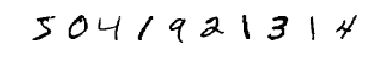

In [4]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
show_mnist(x_train[:10])

## Model

In [5]:
conv_nn = k.models.Sequential(layers=[
    Reshape((28,28,1), input_shape=(28,28)),
    Conv2D(32, kernel_size = 3, activation='relu'),
    BatchNormalization(),
    Conv2D(32, kernel_size = 3, activation='relu'),
    BatchNormalization(),
    Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(64, kernel_size = 3, activation='relu'),
    BatchNormalization(),
    Conv2D(64, kernel_size = 3, activation='relu'),
    BatchNormalization(),
    Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, kernel_size = 4, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.4),
    Dense(10, activation='softmax'),
])

In [6]:
conv_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
__________

### compile and train

In [7]:
conv_nn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
conv_nn.fit(x_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0115 - acc: 0.9962
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0124 - acc: 0.9957
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0115 - acc: 0.9961
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0103 - acc: 0.9970
Epoch 5/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0118 - acc: 0.9962
Epoch 6/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0114 - acc: 0.9961
Epoch 7/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0094 - acc: 0.9969
Epoch 8/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0101 - acc: 0.9970
Epoch 9/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0096 - acc: 0.9968
Epoch 10/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0084 - a

In [13]:
def evaluate_acc(model):
    hists = []
    for i in range(10):
        noise_level = i / 10
        x_test_noise = sap_noise(x_test, noise_level)
        hist = model.evaluate(x_test_noise, y_test, verbose=0)
        title = "noise level:" + str(noise_level) + "\tAccuracy:" + str(hist[1])
        hists.append(hist)
    hists = np.array(hists)
    return hists

Text(0.5, 1.0, 'Predict with Gauusian Noise')

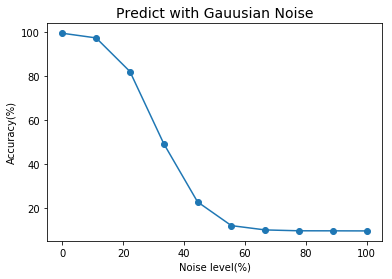

In [14]:
conv_nn_acc = evaluate_acc(conv_nn)
plt.plot(np.linspace(0,100,num=10),conv_nn_acc[:,1]*100, "-o")
plt.xlabel('Noise level(%)')
plt.ylabel('Accuracy(%)')
plt.title("Predict with Gauusian Noise", fontsize=14)

In [15]:
conv_nn_acc

array([[ 0.02215297,  0.9941    ],
       [ 0.09750869,  0.9729    ],
       [ 0.77854967,  0.8205    ],
       [ 3.0232076 ,  0.4932    ],
       [ 6.23485448,  0.2289    ],
       [ 9.0913496 ,  0.1213    ],
       [11.1269525 ,  0.1018    ],
       [12.37095015,  0.0979    ],
       [13.04567136,  0.0977    ],
       [13.43809349,  0.0973    ]])

### Save Model

In [16]:
conv_nn.save("models/conv_nn_origin.h5")

In [5]:
conv_nn = k.models.load_model("models/conv_nn.h5")